In [72]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr



# Read the CSV files
dataset1 = pd.read_csv('file_3_Mar18_Output_1.csv')
dataset2 = pd.read_csv('file_4_Mar18_Output_1.csv')

# Append the datasets
combined_dataset = pd.concat([dataset1, dataset2], ignore_index=True)

# Save the combined dataset to a new CSV file (optional)
combined_dataset.to_csv('combined_csv_file.csv', index=False)

dataset_corr = combined_dataset.corr()

dataset_corr

# true_resloved 
def map_value(val):
    if val == 'floor':
        return 0
    else:
        return 1

# Create new column based on conditions
combined_dataset['true_resolved'] = combined_dataset['resolved'].apply(map_value)


/var/folders/88/jvj1fz2s02q8x01j01f86xt80000gn/T/ipykernel_18835/2505815530.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = combined_dataset.corr()


In [73]:
values_to_exclude = ['B', 'I', 'Z']

c2_dataset = combined_dataset[~combined_dataset['account_status_13_march'].isin(values_to_exclude)]
    

values_to_exclude2 = ['P4', 'TI', 'D3']
c3_dataset = c2_dataset[~c2_dataset['mos'].isin(values_to_exclude2)]



### last step for prediction - analysis


In [74]:
def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR' and service != 'nl' and service != 'ss' and service != 'm-' and service != 'me' and service != 'mm' and service != 'mn' and service != 'mo' and service != "mp" and service != "mt" and service != 'LW' and service != 'NU' and service != 'PX' and service != 'DE' and service != 'iS' and service != 'SP' and service != 'TP' and service and service != 'mP' and service != 'eY' and service != 'iP' and service != 'MP' and service != 'PA' and service != 'PC' and service != 'PS' and service != 'RI' and service != 'VP' and service != 'AT'and service != 'BA'and service != 'Mr'and service != 'AT'and service != 'TS']


    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]


c3_resolved

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,PP
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,IA
6,240316012428 PHX43JOI,E,10006032399,BA,IA BA,resolved,3.0,NaN,[02],9/26/2021,...,NaN,[02],9/26/2021,NaN,0,0,L,0,1,IA
7,240316171347 PHX4I164,B,10002094529,BA,IA BA,resolved,6.0,0.00,[00],9/13/2020,...,0.00,[00],9/13/2020,NaN,0,0,,0,1,IA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798790,240314191841 DAL27M1P,i,20012004106,PP,IA PP TR,resolved,4.0,1591.73,[00],9/19/2021,...,1591.73,[00],9/19/2021,NaN,0,0,,0,1,PP
1798791,240314075300 PHX5SRLR,b,20002002187,PP,mn IA PP TR,resolved,9.0,680.86,[00],12/19/2023,...,680.86,[00],12/19/2023,NaN,0,0,NaN,0,1,PP
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,TA
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,IA


### Floor and resloved rate for each last service type


In [75]:

c3_dataset['true_resolved'] = c3_dataset['true_resolved'].astype(int)

# Group by 'Last service' and calculate rates
rates = c3_dataset.groupby('Last service').agg(
    floor_rate=('true_resolved', lambda x: (x == 0).mean()),
    resolved_rate=('true_resolved', lambda x: (x == 1).mean())
).reset_index()

print(rates)


rates['rate_difference'] = rates['floor_rate'] - rates['resolved_rate']

top_3_positive = rates.nlargest(10, 'rate_difference')[['Last service', 'rate_difference']]

top_3_negative = rates.nsmallest(10, 'rate_difference')[['Last service', 'rate_difference']]

print("Top 3 Positive Differences #Floor higher:") # Floor
print(top_3_positive)
print("\nTop 3 Negative Differences #Resolved higher:") # Resolved   
print(top_3_negative)



   Last service  floor_rate  resolved_rate
0            AA    0.222170       0.777830
1            AP    0.639056       0.360944
2            AU    0.430168       0.569832
3            BL    0.854749       0.145251
4            Ba    0.870147       0.129853
5            CA    0.543978       0.456022
6            CB    0.152518       0.847482
7            CD    0.808333       0.191667
8            CT    0.897508       0.102492
9            DP    0.639859       0.360141
10           DR    0.261106       0.738894
11           ER    0.000000       1.000000
12           FI    0.865672       0.134328
13           FM    0.897603       0.102397
14           GA    0.610000       0.390000
15           HI    0.802307       0.197693
16           IA    0.164641       0.835359
17           IC    0.561530       0.438470
18           LC    0.752984       0.247016
19           LS    0.787293       0.212707
20           MR    0.162000       0.838000
21           OB    0.178571       0.821429
22         

In [76]:
c3_dataset

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,PP
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,NaN,0,1,E,0,0,IA
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,IA
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,IA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,TA
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,IA
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,35.66,[00],8/24/2023,NaN,0,0,,0,1,PP
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,386.63,[00],5/15/2019,A,0,1,L,0,0,IA


### Floor and Resolved pie charts

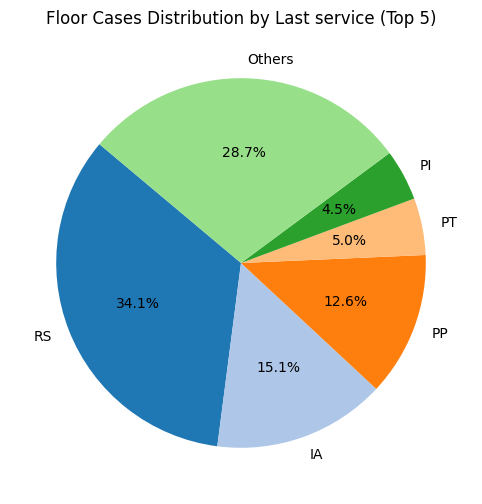

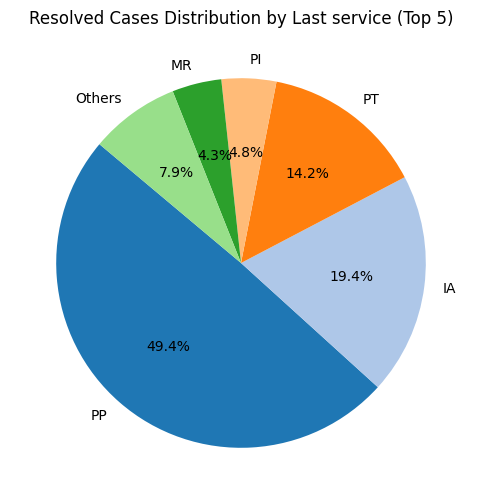

In [77]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title, showing only top 10 occurrences
def create_pie_chart(dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and get top 10
    mos_counts = dataset['Last service'].value_counts().head(5)
    # Add an 'Others' category if there are more than 10 unique values
    if len(dataset['Last service'].value_counts()) > 5:
        others_count = dataset['Last service'].value_counts()[5:].sum()
        mos_counts['Others'] = others_count
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service (Top 5)')

# Create the pie chart for the c3_resolved dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service (Top 5)')

### 13_ to 18_ change analysis


In [89]:

c3_dataset['account_balance_change'] = c3_dataset['account_balance_18_march'] - c3_dataset['account_balance_13_march']
c3_dataset['no_of_accounts_with_syf_change'] = c3_dataset['no_of_accounts_with_syf_18_march'] - c3_dataset['no_of_accounts_with_syf_13_march']


#Deal with Delinquency_history_change
# Drop rows with NaN values in the original delinquency history columns
c3_dataset = c3_dataset.dropna(subset=['delinquency_history_13_march', 'delinquency_history_18_march'])

def extract_elements(s):
    if s == '[]':
        return [0, 0]
    else:
        elements = s.strip('[]').split(',')
        # Check if there are exactly two elements
        if len(elements) == 2:
            return [int(elements[0]), int(elements[1])]
        else:
            return [0, 0]  # Return [0, 0] if there are not exactly two elements

# Apply the function to extract elements
c3_dataset[['delinquency_history_past_due_13_march', 'delinquency_history_current_due_13_march']] = c3_dataset['delinquency_history_13_march'].apply(lambda x: pd.Series(extract_elements(x)))
c3_dataset[['delinquency_history_past_due_18_march', 'delinquency_history_current_due_18_march']] = c3_dataset['delinquency_history_18_march'].apply(lambda x: pd.Series(extract_elements(x)))

# Calculate the total past due for each date and the change
c3_dataset['total_past_due_13_march'] = c3_dataset['delinquency_history_past_due_13_march'] + c3_dataset['delinquency_history_current_due_13_march']
c3_dataset['total_past_due_18_march'] = c3_dataset['delinquency_history_past_due_18_march'] + c3_dataset['delinquency_history_current_due_18_march']
c3_dataset['delinquency_history_change'] = c3_dataset['total_past_due_18_march'] - c3_dataset['total_past_due_13_march']



import statsmodels.api as sm

# Drop rows with NaN values in relevant columns
cleaned_dataset = c3_dataset.dropna(subset=['account_balance_change', 'no_of_accounts_with_syf_change','delinquency_history_change', 'true_resolved'])
print("Number of rows in cleaned_dataset:", len(cleaned_dataset))

#print("Missing values in relevant columns:")
#print(c3_dataset[['account_balance_change', 'no_of_accounts_with_syf_change', 'delinquency_history_change', 'true_resolved']].isna().sum())


# Prepare the data
X = cleaned_dataset[['account_balance_change', 'no_of_accounts_with_syf_change']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = cleaned_dataset['true_resolved']

#from statsmodels.stats.outliers_influence import variance_inflation_factor

#found multicollinearity: then check which one variable to exclude:
# Calculate VIF for each independent variable
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns
#vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print(vif_data)

#print(cleaned_dataset['delinquency_history_change'].unique())
#print(X['delinquency_history_change'].isna().sum())



# Fit the logistic regression model 
model = sm.Logit(y, X).fit()
print(model.summary())



Number of rows in cleaned_dataset: 1677836
Optimization terminated successfully.
         Current function value: 0.494836
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          true_resolved   No. Observations:              1677836
Model:                          Logit   Df Residuals:                  1677833
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                0.003805
Time:                        21:38:22   Log-Likelihood:            -8.3025e+05
converged:                       True   LL-Null:                   -8.3342e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                    

In [101]:

cleaned_dataset = c3_dataset.dropna(subset=['account_balance_13_march', 'no_of_accounts_with_syf_13_march'])

X_13 = cleaned_dataset[['account_balance_13_march', 'no_of_accounts_with_syf_13_march']]


X_13 = sm.add_constant(X_13)  # Add a constant term for the intercept
y_13 = cleaned_dataset['true_resolved']

model = sm.Logit(y_13, X_13).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.496609
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          true_resolved   No. Observations:              1678159
Model:                          Logit   Df Residuals:                  1678156
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:               0.0003140
Time:                        23:22:55   Log-Likelihood:            -8.3339e+05
converged:                       True   LL-Null:                   -8.3365e+05
Covariance Type:            nonrobust   LLR p-value:                2.050e-114
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.3383      0.004    375.99

In [109]:
column_name = ['account_open_date', 'account_status', 'card_activation_status', 'eservice_ind', 'ebill_enrolled_status', 'auto_pay_enrolled_status']
for name in column_name:
    a = name + '_13_march'
    b = name + '_18_march'
    c = name + '_changed'
    c3_dataset[c] = c3_dataset[a] == c3_dataset[b]
    
from scipy.stats import chi2_contingency

for name in column_name:
    c = name + '_changed'
    # Drop rows with NaN values in the relevant columns
    cleaned_dataset = c3_dataset.dropna(subset=[c, 'true_resolved'])
    # Create a contingency table
    contingency_table = pd.crosstab(cleaned_dataset[c], cleaned_dataset['true_resolved'])
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {c}: chi2 = {chi2}, p-value = {p}')

Chi-square test for account_open_date_changed: chi2 = 0.02862835873708981, p-value = 0.8656399835327646
Chi-square test for account_status_changed: chi2 = 9395.349824178262, p-value = 0.0
Chi-square test for card_activation_status_changed: chi2 = 5723.518533354769, p-value = 0.0
Chi-square test for eservice_ind_changed: chi2 = 5035.578245643565, p-value = 0.0
Chi-square test for ebill_enrolled_status_changed: chi2 = 8834.45575092141, p-value = 0.0
Chi-square test for auto_pay_enrolled_status_changed: chi2 = 1012.9745384764705, p-value = 2.7169830778029285e-222


### 13_March

In [111]:
column_name = ['account_open_date', 'account_status', 'card_activation_status', 'eservice_ind', 'ebill_enrolled_status', 'auto_pay_enrolled_status']
for name in column_name:
    c = name + '_13_march'
    # Drop rows with NaN values in the relevant columns
    cleaned_dataset = c3_dataset.dropna(subset=[c, 'true_resolved'])
    # Create a contingency table
    contingency_table = pd.crosstab(cleaned_dataset[c], cleaned_dataset['true_resolved'])
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {c}: chi2 = {chi2}, p-value = {p}')

Chi-square test for account_open_date_13_march: chi2 = 48102.121143578486, p-value = 0.0
Chi-square test for account_status_13_march: chi2 = 6663.083183786851, p-value = 0.0
Chi-square test for card_activation_status_13_march: chi2 = 7732.280473827364, p-value = 0.0
Chi-square test for eservice_ind_13_march: chi2 = 8199.503438400801, p-value = 0.0
Chi-square test for ebill_enrolled_status_13_march: chi2 = 28714.097361367716, p-value = 0.0
Chi-square test for auto_pay_enrolled_status_13_march: chi2 = 6690.8999617697555, p-value = 0.0
